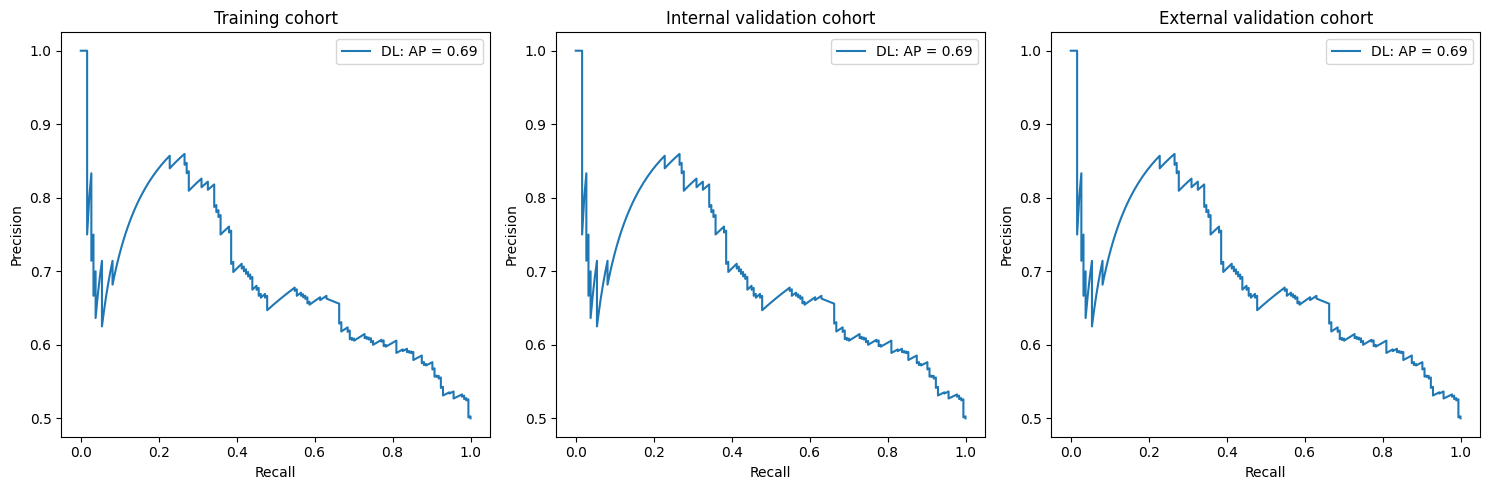

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# 示例数据
# 使用真实数据替换这些数据
y_true = y_test_smote  # 真实标签
# y_scores_clinical = np.random.random(100)  # 临床模型得分
y_scores_dl = y_pred_proba  # 深度学习模型得分
# y_scores_dlcs = np.random.random(100)  # 深度学习+特征选择模型得分

# 计算精确度和召回率
# precision_clinical, recall_clinical, _ = precision_recall_curve(y_true, y_scores_clinical)
precision_dl, recall_dl, _ = precision_recall_curve(y_true, y_scores_dl)
# precision_dlcs, recall_dlcs, _ = precision_recall_curve(y_true, y_scores_dlcs)

# 计算平均精确度分数
# ap_clinical = average_precision_score(y_true, y_scores_clinical)
ap_dl = average_precision_score(y_true, y_scores_dl)
# ap_dlcs = average_precision_score(y_true, y_scores_dlcs)

# 绘制PR曲线的函数
def plot_pr_curve(recall, precision, label, ap):
    plt.plot(recall, precision, label=f'{label}: AP = {ap:.2f}')

plt.figure(figsize=(15, 5))

# 绘制训练集的PR曲线
plt.subplot(1, 3, 1)
# plot_pr_curve(recall_clinical, precision_clinical, 'Clinical', ap_clinical)
plot_pr_curve(recall_dl, precision_dl, 'DL', ap_dl)
# plot_pr_curve(recall_dlcs, precision_dlcs, 'DLCS', ap_dlcs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Training cohort')
plt.legend()

# 绘制内部验证集的PR曲线
plt.subplot(1, 3, 2)
# plot_pr_curve(recall_clinical, precision_clinical, 'Clinical', ap_clinical)
plot_pr_curve(recall_dl, precision_dl, 'DL', ap_dl)
# plot_pr_curve(recall_dlcs, precision_dlcs, 'DLCS', ap_dlcs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Internal validation cohort')
plt.legend()

# 绘制外部验证集的PR曲线
plt.subplot(1, 3, 3)
# plot_pr_curve(recall_clinical, precision_clinical, 'Clinical', ap_clinical)
plot_pr_curve(recall_dl, precision_dl, 'DL', ap_dl)
# plot_pr_curve(recall_dlcs, precision_dlcs, 'DLCS', ap_dlcs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('External validation cohort')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

data_df = pd.read_csv('result.csv')

X = data_df[["max0_1","max0_2","max0_3","max1_1","max1_2","max1_3"]]
y = data_df['label']

# 将数据分为训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, y_train = X,y
X_test, y_test = X,y

smote = SMOTE(random_state=48)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote,y_test_smote = smote.fit_resample(X_test,y_test)

# 标准化数据
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test_smote = scaler.transform(X_test_smote)

# 创建Pipeline，包含标准化和逻辑回归
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # 标准化
#     ('logreg', LogisticRegression())  # 逻辑回归
# ])
model_svm = SVC(probability=True, random_state=0)
# model_svm = DecisionTreeClassifier(random_state=0,max_depth=4)
# model_svm = LogisticRegression(random_state=0)
model_svm.fit(X_train_smote, y_train_smote)

SVC(probability=True, random_state=0)

In [22]:
y_pred = model_svm.predict(X_test_smote)
y_pred_proba = model_svm.predict_proba(X_test_smote)[:,1]
# y_pred_proba = model_svm.predict_proba(X_test)[:, 1]

# 模型评价
# print("Best Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test_smote, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test_smote, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       184
           1       0.66      0.64      0.65       184

    accuracy                           0.66       368
   macro avg       0.66      0.66      0.66       368
weighted avg       0.66      0.66      0.66       368

Confusion Matrix:
[[124  60]
 [ 66 118]]


In [6]:
len(y_test)

285

In [10]:
y_pred_proba

array([[0.38437252, 0.61562748],
       [0.64161911, 0.35838089],
       [0.69719257, 0.30280743],
       [0.61437171, 0.38562829],
       [0.64344519, 0.35655481],
       [0.46036514, 0.53963486],
       [0.46616509, 0.53383491],
       [0.51544412, 0.48455588],
       [0.36353644, 0.63646356],
       [0.60169376, 0.39830624],
       [0.44826772, 0.55173228],
       [0.51498161, 0.48501839],
       [0.52130872, 0.47869128],
       [0.64352022, 0.35647978],
       [0.6318888 , 0.3681112 ],
       [0.63469609, 0.36530391],
       [0.4606287 , 0.5393713 ],
       [0.53243716, 0.46756284],
       [0.34869979, 0.65130021],
       [0.34372117, 0.65627883],
       [0.545373  , 0.454627  ],
       [0.44245343, 0.55754657],
       [0.63227268, 0.36772732],
       [0.64341476, 0.35658524],
       [0.48154357, 0.51845643],
       [0.57945997, 0.42054003],
       [0.52215688, 0.47784312],
       [0.41404564, 0.58595436],
       [0.48257201, 0.51742799],
       [0.3902288 , 0.6097712 ],
       [0.